In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# File to Load (Remember to change these)
city_data_path = "../05-Metplotlib/city_data.csv"
ride_data_path = "../05-Metplotlib/ride_data.csv"


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
merged_df = city_data_df.merge(ride_data_df, on = 'city')

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

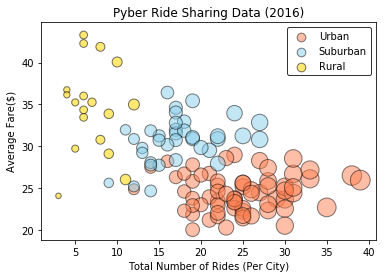

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban_city = merged_df.loc[(merged_df["type"] == "Urban")]
suburban_city = merged_df.loc[(merged_df["type"] == "Suburban")]
rural_city = merged_df.loc[(merged_df["type"] == "Rural")]

urban_city_avgfare = urban_city.groupby(['city'])['fare'].mean()
urban_city_ttlrides = urban_city.groupby(['city']).count()['ride_id']
urban_city_ttldrivers = urban_city.groupby(['city'])['driver_count'].value_counts()

suburban_city_avgfare = suburban_city.groupby(['city'])['fare'].mean()
suburban_city_ttlrides = suburban_city.groupby(['city']).count()['ride_id']
suburban_city_ttldrivers = suburban_city.groupby(['city'])['driver_count'].value_counts()

rural_city_avgfare = rural_city.groupby(['city'])['fare'].mean()
rural_city_ttlrides = rural_city.groupby(['city']).count()['ride_id']
rural_city_ttldrivers = rural_city.groupby(['city'])['driver_count'].value_counts()


# Build the scatter plots for each city types
plt.scatter(urban_city_ttlrides, urban_city_avgfare,s=urban_city_ttldrivers*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(suburban_city_ttlrides, suburban_city_avgfare,s=suburban_city_ttldrivers*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_city_ttlrides, rural_city_avgfare,s=rural_city_ttldrivers*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../05-Metplotlib/Pyber Ride Sharing.png")

# Show plot
plt.show()

## Total Fares by City Type

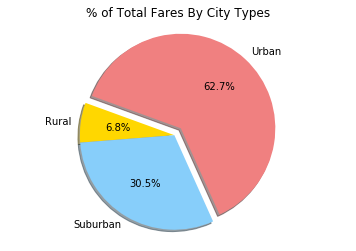

In [5]:
# Calculate Type Percents
# Build Pie Chart
total_fare = merged_df.groupby(['type'])['fare'].sum()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")


# Save Figure
plt.savefig("../05-Metplotlib/Percentage of Total Fares by City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

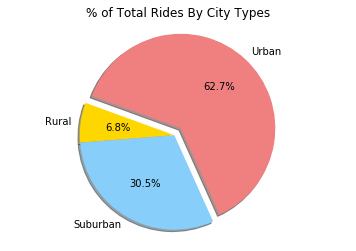

In [9]:
# Calculate Ride Percents
# Build Pie Chart
total_rides = merged_df.groupby(['type'])['ride_id'].count()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")


# Save Figure
plt.savefig("../05-Metplotlib/Percentage of Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

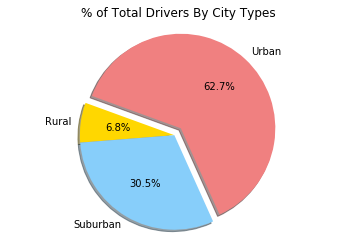

In [10]:
# Calculate Driver Percents
# Build Pie Chart
total_drivers = merged_df.groupby(['type'])['driver_count'].sum()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")


# Save Figure
plt.savefig("../05-Metplotlib/Percentage of Total Drivers by City Type.png")

# Show Figure
plt.show()